In [38]:
# Import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
from wordcloud import WordCloud, STOPWORDS

import re, string
from bs4 import BeautifulSoup
import unicodedata

# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Feature Selection
from sklearn.feature_selection import chi2, SelectKBest, RFE, mutual_info_classif
# Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
# Univariate
from sklearn.feature_selection import SelectPercentile, f_classif

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# Reading the True/Real news Data Set using pandas
True_data=pd.read_csv("F:\ExcelR\Excelr_Internship\Real_Fake News Prediction\Dataset\True.csv",encoding="Unicode_escape",error_bad_lines=False)
True_data.head()

C:\Users\nazee\AppData\Local\Temp\ipykernel_18404\2727937118.py:2: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



Skipping line 11067: expected 4 fields, saw 8



title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [3]:
# Reading the False/Fake news Data Set using pandas
Fake_data=pd.read_csv("F:\ExcelR\Excelr_Internship\Real_Fake News Prediction\Dataset\Fake.csv",encoding="Unicode_escape",error_bad_lines=False)
Fake_data.head()

C:\Users\nazee\AppData\Local\Temp\ipykernel_18404\3642876878.py:2: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.





title  \
0   Donald Trump Sends Out Embarrassing New Year...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obamas Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [4]:
# Creating a dataframe using pandas.
df_RealNews=pd.DataFrame(True_data)
print(df_RealNews.head())
print(df_RealNews.shape)
df_Fakenews=pd.DataFrame(Fake_data)
print(df_Fakenews.head())
print(df_Fakenews.shape)

                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   
(21416, 4)
                                               title  \
0   Donald Trump Sends Out Emba

In [5]:
df_RealNews['category'] = 1
df_Fakenews['category'] = 0

In [6]:
print(df_RealNews.head())
print(df_Fakenews.head())

                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  category  
0  December 31, 2017          1  
1  December 29, 2017          1  
2  December 31, 2017          1  
3  December 30, 2017          1  
4  December 29, 2017          1  
                                      

In [7]:
df_news = pd.concat([df_RealNews,df_Fakenews]) #Merging the 2 datasets

In [8]:
df_news.isnull().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [9]:
df_news['category'].value_counts()

0    23481
1    21416
Name: category, dtype: int64

In [10]:
df_news = df_news.dropna()

In [11]:
# number of news
print('Number of fake news:', df_Fakenews.shape)
print('Number of true news:', df_RealNews.shape)
print('Total number of news:', df_news.shape)

Number of fake news: (23481, 5)
Number of true news: (21416, 5)
Total number of news: (44897, 5)


C:\Users\nazee\AppData\Local\Temp\ipykernel_18404\947402076.py:8: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



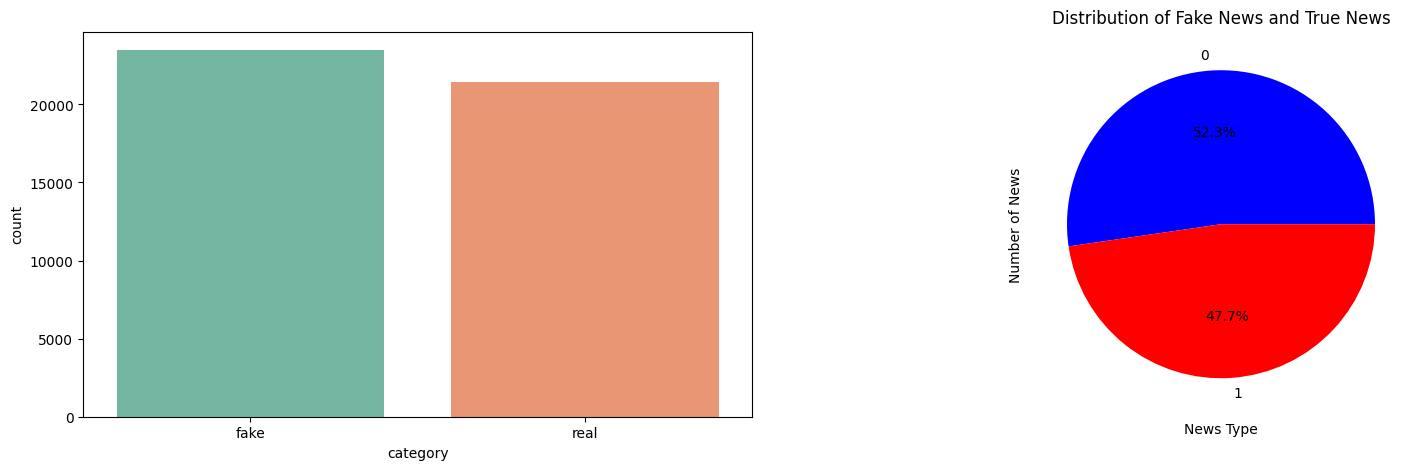

In [12]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
ax = sns.countplot(x = df_news['category'],ax=ax[0],palette="Set2")
plt.title('Distribution of Fake News and True News')
ax.set(xticklabels=['fake', 'real'])
plt.xlabel('News Type')
plt.ylabel('Number of News')
plt.pie(df_news["category"].value_counts().values,explode=[0,0],labels=df_news["category"].value_counts().index, autopct='%1.1f%%',colors=['Blue','Red'])
fig.show()

In [13]:
# breakdown of different subjects
df_news.subject.value_counts()

politicsNews       11271
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

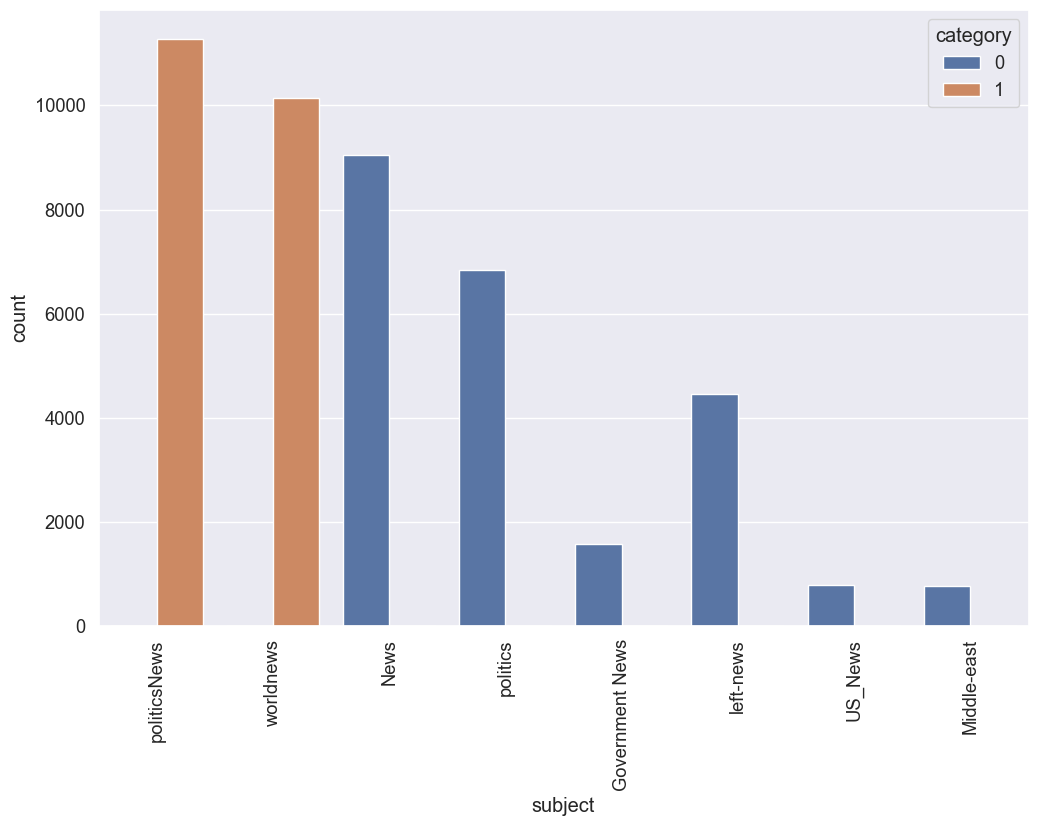

In [14]:
plt.figure(figsize = (12,8))
sns.set(style = "darkgrid",font_scale = 1.2)
chart = sns.countplot(x = "subject", hue = "category" , data = df_news)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

"""SINCE THE TOPICS IN SUBJECT COLUMN ARE DIFFERENT FOR BOTH CATEGORIES, HENCE WE HAVE TO EXCLUDE IT FROM FINAL TEXT COLUMN"""

In [15]:
# empty news
df_news.text[df_news.text.str.strip()==''].count()

631

In [16]:
df_news.drop(df_news.text[df_news.text.str.strip()==''].index,inplace=True) 

In [17]:
# empty news
df_news.text[df_news.text.str.strip()==''].count()

0

In [18]:
# From above we understand that subject is difrrent for both categories, HENCE WE HAVE TO EXCLUDE IT FROM FINAL TEXT COLUMN
df_news['news'] = df_news['text'] + " " + df_news['title']
df_news.drop(['subject', 'date', 'text', 'title'], axis=1, inplace=True)
df_news.head(5)

category                                               news
0         1  WASHINGTON (Reuters) - The head of a conservat...
1         1  WASHINGTON (Reuters) - Transgender people will...
2         1  WASHINGTON (Reuters) - The special counsel inv...
3         1  WASHINGTON (Reuters) - Trump campaign adviser ...
4         1  SEATTLE/WASHINGTON (Reuters) - President Donal...

In [19]:
# check duplicated news
df_news.duplicated().sum() 

5576

In [20]:
# Check for duplicates
duplicates = df_news[df_news.duplicated()]
duplicates.head()

category                                               news
445         1  WASHINGTON (Reuters) - The U.S. Senate on Thur...
778         1  BEIJING (Reuters) - U.S. President Donald Trum...
892         1  WASHINGTON (Reuters) - U.S. House of Represent...
896         1  WASHINGTON (Reuters) - President Donald Trump ...
974         1  WASHINGTON (Reuters) - Federal investigators p...

In [21]:
if not duplicates.empty:
    print("Duplicate rows found. Removing...")
    df_news.drop_duplicates(inplace=True)
else:
    print("No duplicates found.")

# Check for empty rows
empty_rows = df_news[df_news.isnull().all(axis=1)]

if not empty_rows.empty:
    print("Empty rows found. Removing...")
    df_news.dropna(inplace=True)
else:
    print("No empty rows found.")

Duplicate rows found. Removing...
No empty rows found.


In [22]:
# number of news
print('Number of fake news:', df_news[df_news.category == 0].shape)
print('Number of true news:', df_news[df_news.category == 1].shape)
print('Total number of news:', df_news.shape)

Number of fake news: (17461, 2)
Number of true news: (20614, 2)
Total number of news: (38075, 2)


In [23]:
df_news = shuffle(df_news)
df_news = df_news.reset_index(drop=True)

In [24]:
from tqdm import tqdm
def text_size(df_news):
    sizes = []
    for text in tqdm(df_news['text']):
        len_ = len(text.split())
        sizes.append(len_)
    return np.array(sizes)

fake_size = text_size(df_Fakenews)
true_size = text_size(df_RealNews)
df_Fakenews['len'] = fake_size
df_RealNews['len'] = true_size

100%|██████████| 21416/21416 [00:00<00:00, 33235.78it/s]


In [25]:
fig = go.Figure()
fig.add_trace(go.Box(y=list(df_Fakenews['len']), name='Fake',
                marker_color = 'indianred'))
fig.add_trace(go.Box(y=list(df_RealNews['len']), name ='Real',
                marker_color = 'lightseagreen'))

fig.update_layout({
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor': 'rgba(0, 0, 0, 0)',
        'title': 'Box plot',
})
fig.show()

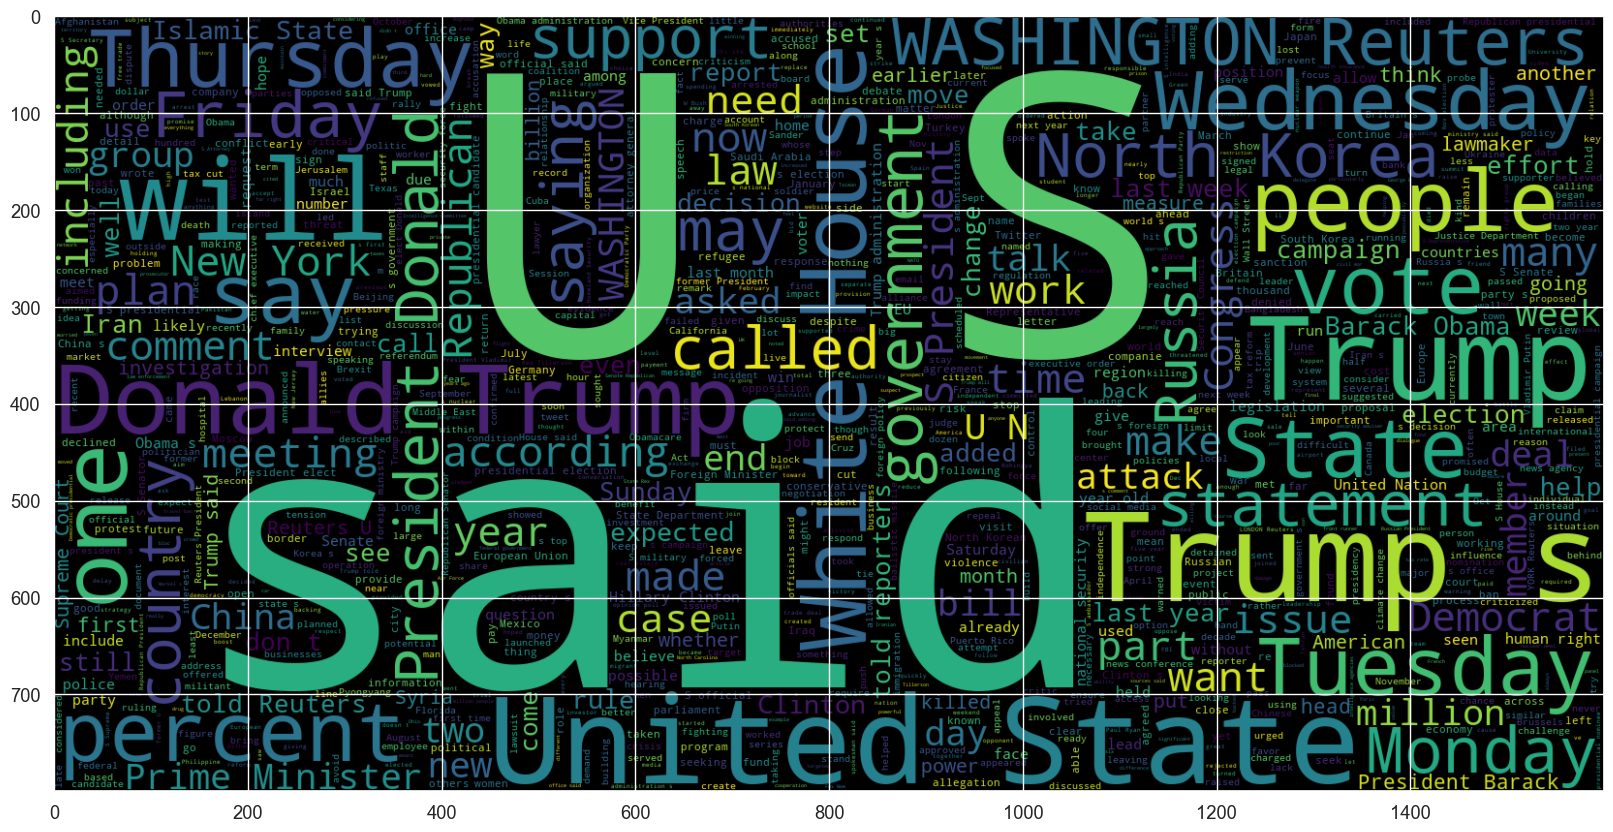

In [26]:
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df_news[df_news.category == 1].news))
plt.imshow(wc , interpolation = 'bilinear')

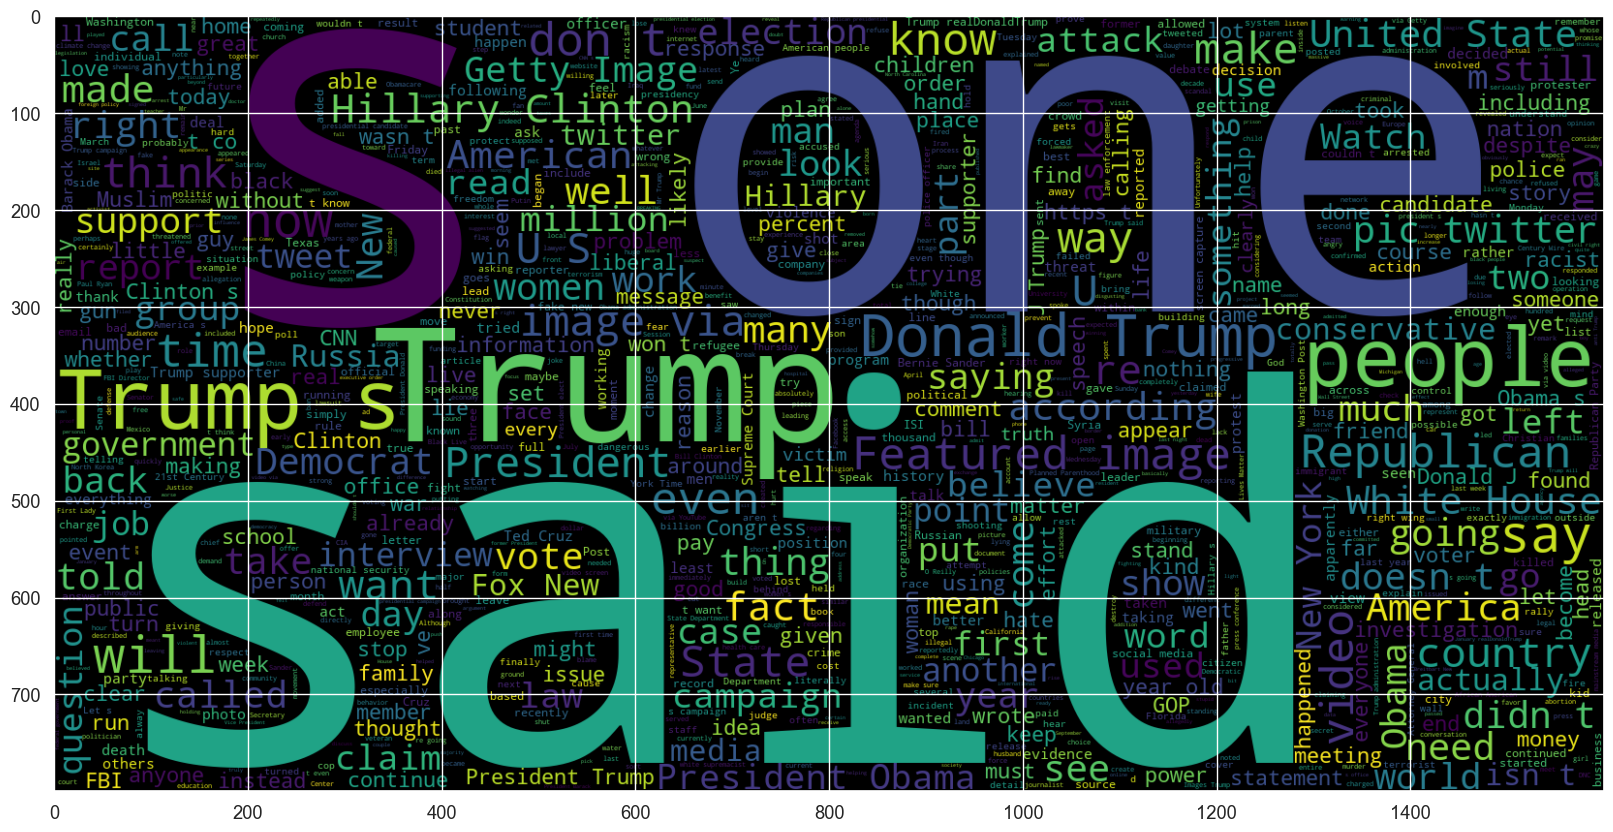

In [29]:
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, stopwords = STOPWORDS).generate(" ".join(df_news[df_news.category == 0].news))
plt.imshow(wc , interpolation = 'bilinear')

In [36]:
def getAccuracyMostImportantWord(df_news, label='news'):
    vect = TfidfVectorizer()
    X = vect.fit_transform(df_news[label])
    y = df_news['category']

    new_feature = [] 
    s = SelectKBest(chi2, k=1)
    X_new = s.fit_transform(X, y)
    mask = s.get_support()
    for bool, feature in zip(mask, vect.get_feature_names_out()):
        if bool:
            new_feature.append(feature)
    print(new_feature)
    result = []
    for text in df_news[label]:
        if new_feature[0] in text:
            result.append(0)
        else:
            result.append(1)
    print(accuracy_score(df_news['category'], result))

In [32]:
df_news['news'].str.count('reuters').sum()

22

In [34]:
def wordopt(text):
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\[[^]]*\]', '', text)
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)  
    text = re.sub('((?:Photo by|Featured image|Via:).+)', '', text)
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
   
    return text

df_news['news'] = df_news['news'].apply(wordopt)


C:\Users\nazee\AppData\Local\Temp\ipykernel_18404\1237650268.py:4: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.



In [39]:
getAccuracyMostImportantWord(df_news)

['you']
0.7321602101116218


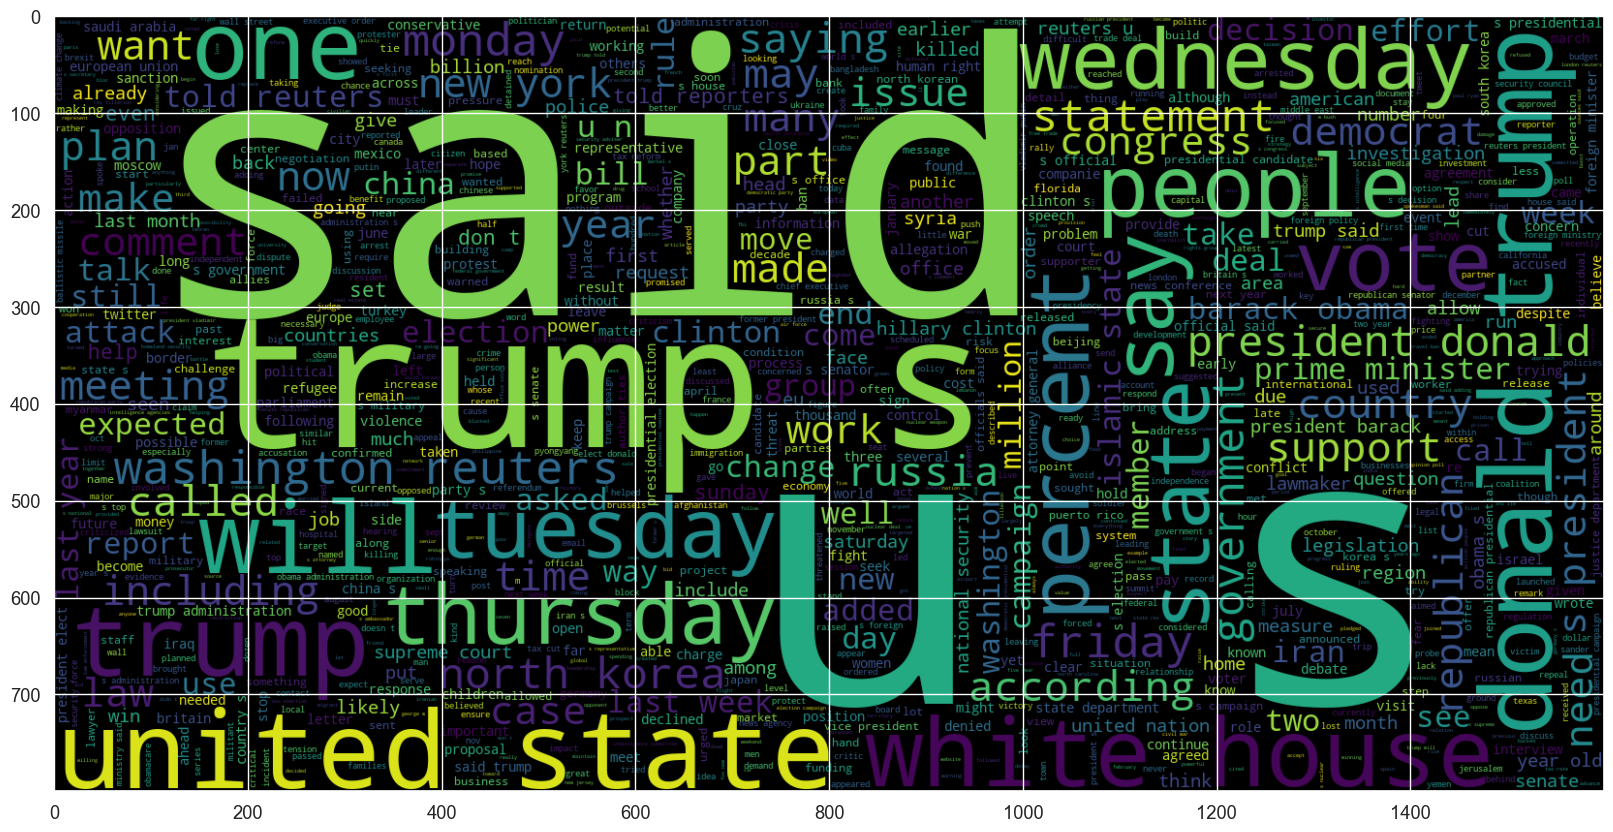

In [40]:
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df_news[df_news.category == 1].news))
plt.imshow(wc , interpolation = 'bilinear')

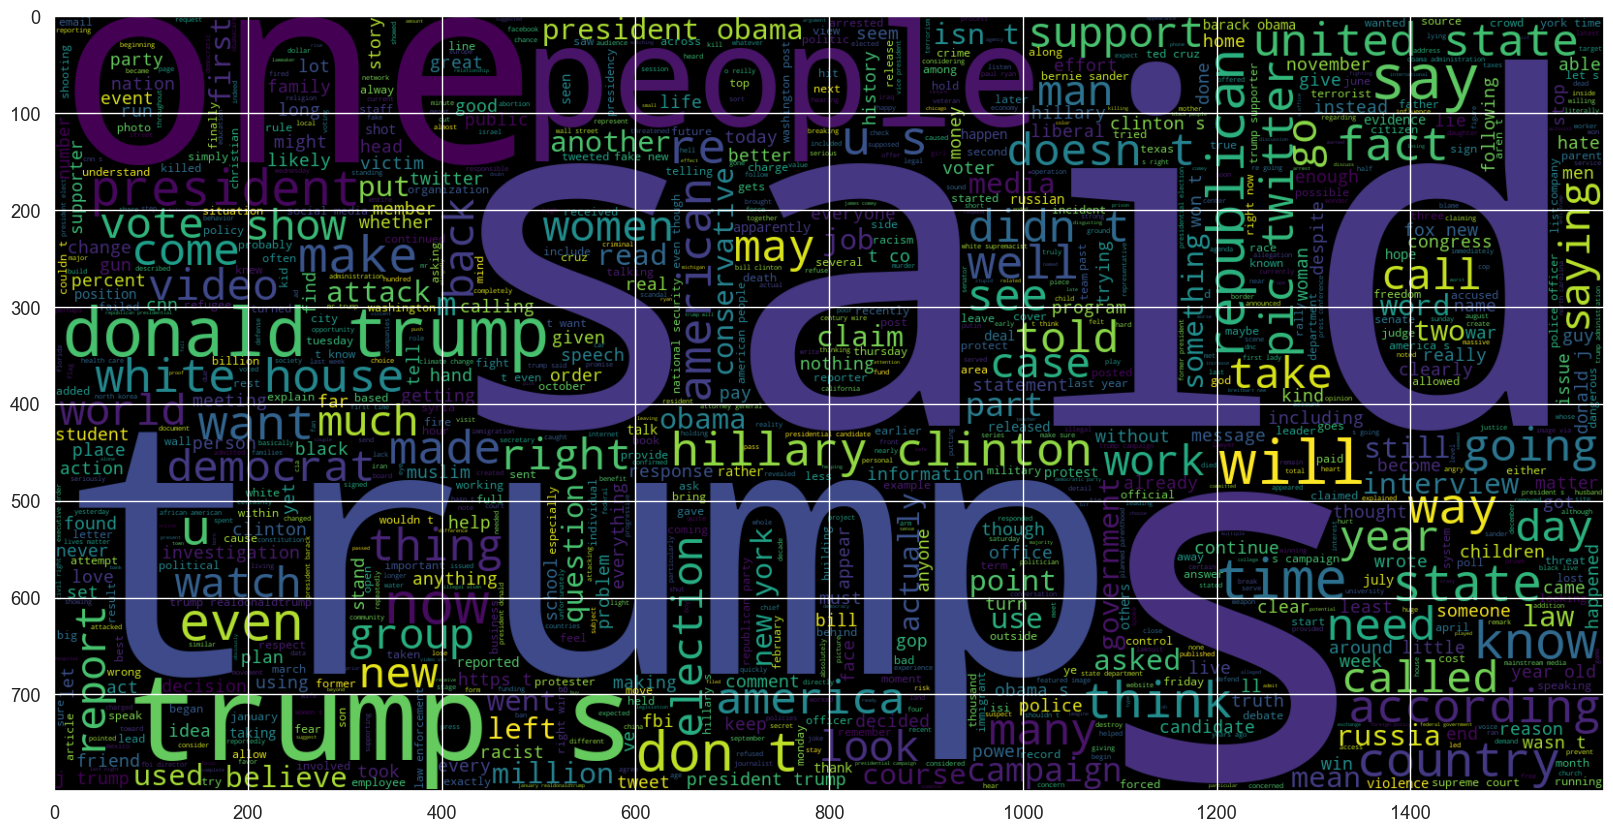

In [41]:
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, stopwords = STOPWORDS).generate(" ".join(df_news[df_news.category == 0].news))
plt.imshow(wc , interpolation = 'bilinear')